In [11]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

## 1. Знакомство с библиотеками

In [225]:
H = 256
W = 256

In [96]:
mat1 = np.zeros((H,W),dtype = np.uint8)
mat1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [97]:
mat1.fill(255)
mat1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

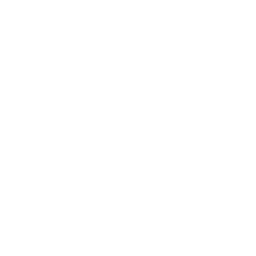

In [98]:
im = Image.fromarray(mat1)
im.save('first.png', 'png')
im

In [99]:
im = np.zeros((H, W, 3), dtype=np.uint8)
im[:, :] = np.array([255, 0, 0],dtype=np.uint8)

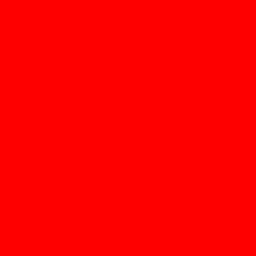

In [100]:
Image.fromarray(im)

In [101]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)

for y in range(H):
    for x in range(W):
        value = (x*y)%256
        image_array[y, x] = [value, value, value]

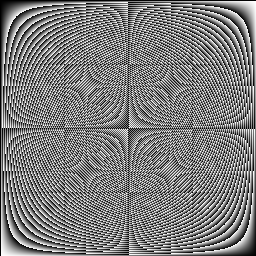

In [102]:
Image.fromarray(image_array)

## 2. Отрисовка прямых линий

In [362]:
class Drawline:
    def dotted_line(image, x0, y0, x1, y1, count, color):
        step = 1.0/count
        for t in np.arange(0,1,step):
            x = round((1.0 - t)*x0 + t*x1)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x] = color

    
    def dotted_line_v2(image, x0, y0, x1, y1, color):
        count = np.sqrt((x0-x1)**2+(y0-y1)**2)
        step = 1.0/count
        for t in np.arange(0,1,step):
            x = round((1.0 - t)*x0 + t*x1)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x] = color

    
    def x_loop_line(image, x0, y0, x1, y1, color):
        for x in range(round(x0), round(x1)):
            t = (x-x0)/(x1-x0)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x]=color

    
    def x_loop_line_hotfix_1(image, x0, y0, x1, y1, color):
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0
        for x in range(round(x0), round(x1)):
            t = (x-x0)/(x1-x0)
            y = round((1.0 - t)*y0 + t*y1)
            image[y,x]=color

    
    def x_loop_line_hotfix_2(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0
            
        for x in range(int(x0), int(x1)):
            t = (x-x0)/(x1-x0)
            y = round((1.0 - t)*y0 + t*y1)
            if xchange:
                image[x,y]=color
            else:
                image[y,x]=color

    
    def x_loop_line_v2(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0

        y = y0
        dy = abs(y1 - y0)/(x1 - x0)
        derror = 0.0
        y_update = 1 if y1 > y0 else -1

        for x in range(int(x0),int(x1)):
            if xchange:
                image[x,round(y)]=color
            else:
                image[round(y),x]=color
                
            derror += dy
            if derror > 0.5:
                derror -= 1
                y+= y_update
            
    def x_loop_v2_no_y_calc(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0

        y = y0
        dy = 2*abs(y1 - y0)#тут
        derror = 0.0
        y_update = 1 if y1 > y0 else -1

        for x in range(int(x0), int(x1)):
            if xchange:
                image[x,round(y)]=color
            else:
                image[round(y),x]=color

            derror += dy
            if (derror > (x1-x0)):#тут
                derror -= 2*(x1-x0)#тут
                y += y_update
            

    
    def x_loop_v2_no_y_calc_v2(image, x0, y0, x1, y1, color):
        pass

    
    def bresenham_line(image, x0, y0, x1, y1, color):
        xchange = False
        
        if (abs(x0-x1)<abs(y0-y1)):
            x0, y0 = y0, x0
            x1, y1 = y1, x1
            xchange = True
            
        if (x0 > x1):
            x0, x1 = x1, x0
            y0, y1 = y1, y0

        y = y0
        dy = 2*abs(y1 - y0)#тут
        derror = 0.0
        y_update = 1 if y1 > y0 else -1

        for x in range(round(x0), round(x1)):
            if xchange:
                image[x,round(y)]=color
            else:
                image[round(y),x]=color

            derror += dy
            if (derror > (x1-x0)):#тут
                derror -= 2*(x1-x0)#тут
                y += y_update
            
        

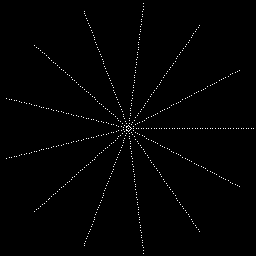

In [351]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.dotted_line(image_array, x0, y0, x1, y1, 50, np.array([255,255,255],dtype = np.uint8))
Image.fromarray(image_array)

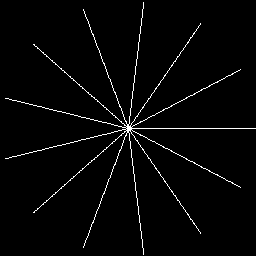

In [352]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.dotted_line_v2(image_array, x0, y0, x1, y1, np.array([255,255,255],dtype = np.uint8))
Image.fromarray(image_array)

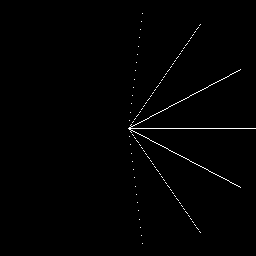

In [353]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

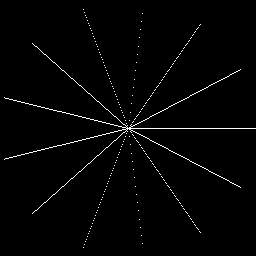

In [354]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line_hotfix_1(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

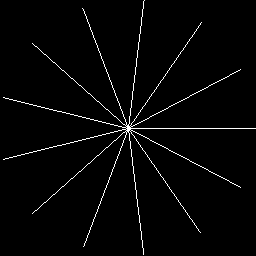

In [355]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line_hotfix_2(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

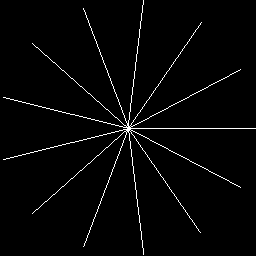

In [356]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_line_v2(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

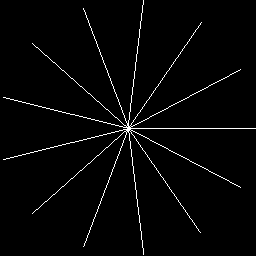

In [357]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_v2_no_y_calc(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

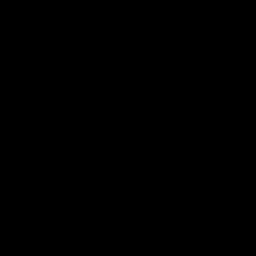

In [358]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.x_loop_v2_no_y_calc_v2(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

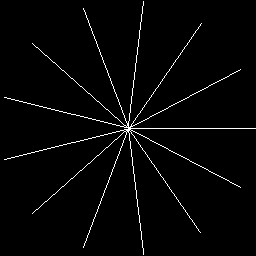

In [363]:
image_array = np.zeros((H, W, 3), dtype=np.uint8)
a = 0
for num_line in range(13):
    a = 2*np.pi/13 * num_line
    x0, y0 = H//2, W//2
    x1 = H//2 + np.cos(a)*(H//2)
    y1 = W//2 + np.sin(a)*(W//2)
    Drawline.bresenham_line(image_array, x0, y0, x1, y1, np.array([255,255,255], dtype=np.uint8))
Image.fromarray(image_array)

## 3. Читаем .obj

In [391]:
def read_obj_file(file_path):
    points = []
    polygons = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts:
                if parts[0] == 'v':  # Вершины
                    point = tuple(map(float, parts[1:4]))
                    points.append(point)
                elif parts[0] == 'f':  # Грани
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    polygons.append(face)

    return points, polygons

# путь к файлу OBJ
obj_file_path = r"model_1.obj"

point_list, face_list = read_obj_file(obj_file_path)

In [417]:
np.array(tuple([1,2,3]))

array([1, 2, 3])

## 4. Смотрим .obj

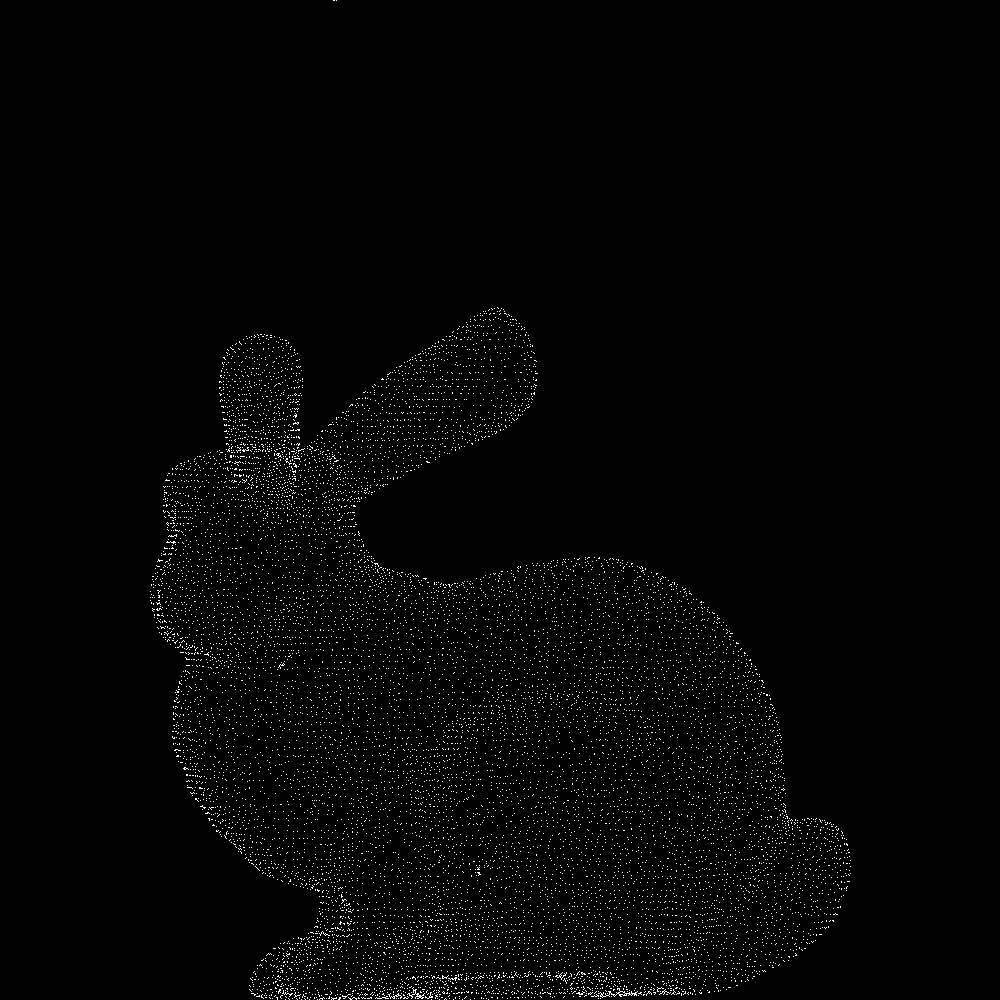

In [406]:
image = np.zeros((1000,1000),dtype=np.uint8)
for x,y,z in point_list:
    image[-round(y*7000)][round(x*7000+500)] = 255

Image.fromarray(image).convert('1')

## 5. Рисуем линии .obj

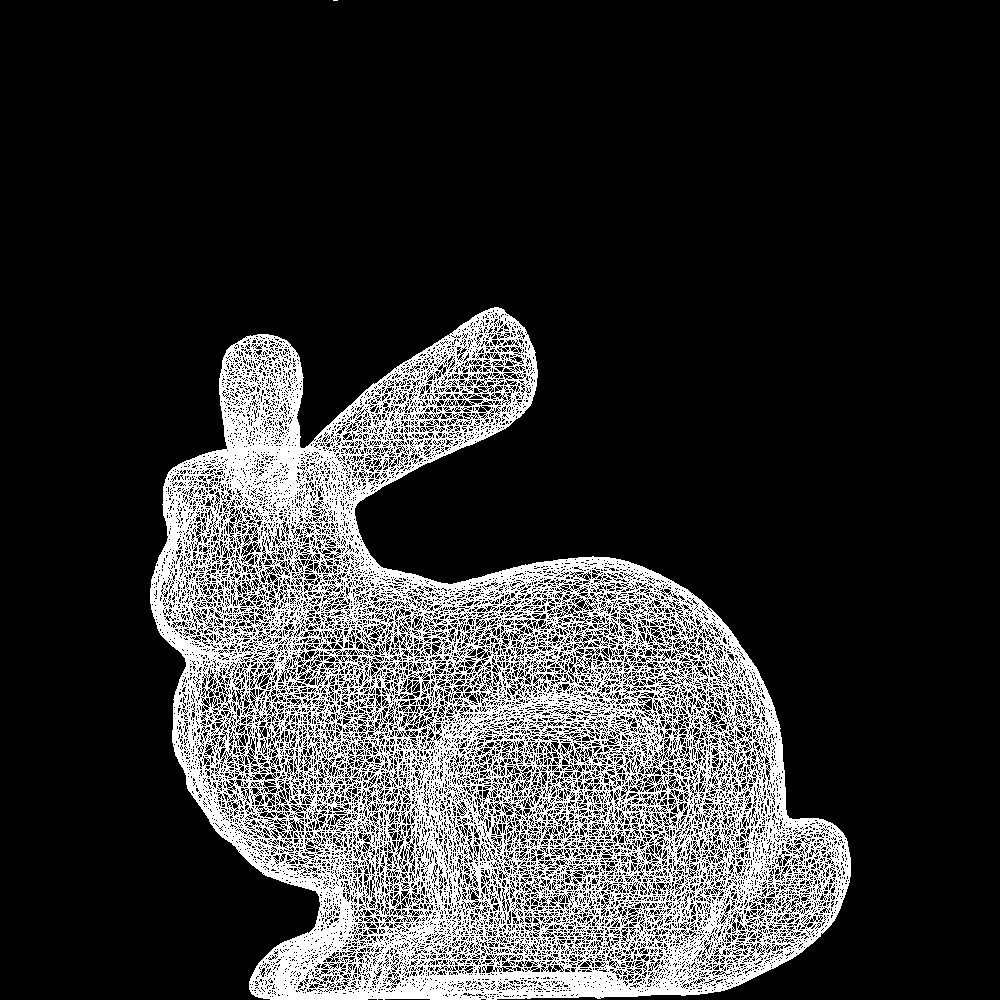

In [421]:
image = np.zeros((1000,1000),dtype=np.uint8)
for d in face_list:
    
    points = list(point_list[i] for i in d)
    for i in range(len(points)-1):
        x0 = points[i][0]*7000+500
        y0 = -points[i][1]*7000
        x1 = points[i+1][0]*7000+500
        y1 = -points[i+1][1]*7000
        Drawline.bresenham_line(image, x0, y0, x1, y1, 255)
        
    x0 = points[0][0]*7000+500
    y0 = -points[0][1]*7000
    x1 = points[-1][0]*7000+500
    y1 = -points[-1][1]*7000
    Drawline.bresenham_line(image, x0, y0, x1, y1, 255)
Image.fromarray(image).convert('P')

In [418]:
face_list[0]

[0, 1, 2]